# Importing Modules & Data

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [8]:
ls

drive/  sample_data/


In [9]:
dataTrain = pd.read_csv('drive/My Drive/train.csv')#,index_col='CUSTOMER_ID')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,19,21,23,26,28,29,30,32,82,83,85,91,269,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EDA & Data Preprocessing

In [10]:
pd.set_option('display.max_columns',None)
dataTrain.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,BL_TAG,TWL_TAG,PL_TAG,AL_CNC_TAG,AGRI_TAG,CE_TAG,CV_TAG,EDU_TAG,TL_TAG,OTHER_LOANS_TAG,LAP_TAG,LAS_TAG,EEG_TAG,BBG_TAG,HL_TAG,GL_TAG,AL_CLOSED,PL_CLOSED,BL_CLOSED,TWL_CLOSED,CV_CLOSED,LAP_CLOSED,LAS_CLOSED,EEG_CLOSED,BBG_CLOSED,GL_CLOSED,CC_HOLD_MON_03,CC_HOLD_MON_02,CC_HOLD_MON_01,CC_ACTIVE_MON_03,CC_ACTIVE_MON_02,CC_ACTIVE_MON_01,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE_MON_03,DC_ACTIVE_MON_02,DC_ACTIVE_MON_01,DC_ACTIVE,DC_SPEND_MON_03,DC_SPEND_MON_02,DC_SPEND_MON_01,CC_SPEND_MON_04,CC_SPEND_MON_01,CC_SPEND_MON_02,CC_SPEND_MON_03,DC_SPEND_MON_04,PM_FD_MON_01,PM_FD_MON_02,PM_FD_MON_04,CR_LIMIT,STMT_MON_03,STMT_MON_02,STMT_MON_01,COC_ELIGIBLE,LAP_SCRUB_LIVE,LAS_SCRUB_LIVE,PL_SCRUB_LIVE,GL_SCRUB_LIVE,TWL_SCRUB_LIVE,BL_SCRUB_LIVE,CEL_SCRUB_LIVE,TL_SCRUB_LIVE,AL_SCRUB_LIVE,LAP_SCRUB_CLOSED,LAS_SCRUB_CLOSED,PL_SCRUB_CLOSED,GL_SCRUB_CLOSED,TWL_SCRUB_CLOSED,BL_SCRUB_CLOSED,CEL_SCRUB_CLOSED,TL_SCRUB_CLOSED,AL_SCRUB_CLOSED,MATURITY_GL,MATURITY_LAP,MATURITY_LAS,STMT_CON_DAE_ACTIVE_MON_01,BTE_ACTIVE_MON_01,COC_ACTIVE_MON_01,PL2CC_ACTIVE_MON_01,MER_EMI_ACTIVE_MON_01,TRN_CON_DAE_ACTIVE_MON_01,STMT_CON_DAE_CLOSED_MON_01,BTE_CLOSED_MON_01,COC_CLOSED_MON_01,PL2CC_CLOSED_MON_01,MER_EMI_CLOSED_MON_01,TRN_CON_DAE_CLOSED_MON_01,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,NB_MON_01_CNT,NB_MON_02_CNT,NB_MON_03_CNT,CDMAT_MON_01,CDMAT_MON_04,MF_MON_04,MF_MON_01,RD_MON_04,RD_MON_01,FD_MON_04,FD_MON_01,LI_MON_04,LI_MON_01,GI_MON_04,GI_MON_01,CC_TXN_MON_01,CC_SPEND_MON_06,CC_TXN_MON_06,CC_TXN_MON_03,CC_TXN_MON_02,CC_TXN_MON_04,CC_SPEND_MON_05,CC_TXN_MON_05,DC_TXN_MON_04,DC_TXN_MON_01,DC_SPEND_MON_06,DC_TXN_MON_06,DC_SPEND_MON_05,DC_TXN_MON_05,DC_TXN_MON_03,DC_TXN_MON_02,DC_SPEND_MON_04_ENT,DC_SPEND_MON_04_MED,DC_SPEND_MON_04_GRC,DC_SPEND_MON_04_HMD,DC_SPEND_MON_04_HBY,DC_SPEND_MON_04_CARE,DC_SPEND_MON_04_TRL,DC_SPEND_MON_04_RST,DC_SPEND_MON_04_JER,DC_SPEND_MON_04_HTL,DC_SPEND_MON_04_ATM,DC_SPEND_MON_03_ENT,DC_SPEND_MON_03_MED,DC_SPEND_MON_03_HMD,DC_SPEND_MON_03_HBY,DC_SPEND_MON_03_CARE,DC_SPEND_MON_03_TRL,DC_SPEND_MON_03_RST,DC_SPEND_MON_03_JER,DC_SPEND_MON_03_HTL,DC_SPEND_MON_03_ATM,DC_SPEND_MON_02_ENT,DC_SPEND_MON_02_MED,DC_SPEND_MON_02_HMD,DC_SPEND_MON_02_HBY,DC_SPEND_MON_02_CARE,DC_SPEND_MON_02_TRL,DC_SPEND_MON_02_RST,DC_SPEND_MON_02_JER,DC_SPEND_MON_02_HTL,DC_SPEND_MON_02_ATM,DC_SPEND_MON_01_ENT,DC_SPEND_MON_01_MED,DC_SPEND_MON_01_HMD,DC_SPEND_MON_01_HBY,DC_SPEND_MON_01_CARE,DC_SPEND_MON_01_TRL,DC_SPEND_MON_01_RST,DC_SPEND_MON_01_JER,DC_SPEND_MON_01_HTL,DC_SPEND_MON_01_ATM,DC_SPEND_MON_05_ENT,DC_SPEND_MON_05_MED,DC_SPEND_MON_05_HMD,DC_SPEND_MON_05_HBY,DC_SPEND_MON_05_CARE,DC_SPEND_MON_05_TRL,DC_SPEND_MON_05_RST,DC_SPEND_MON_05_JER,DC_SPEND_MON_05_HTL,DC_SPEND_MON_05_ATM,CC_SPEND_MON_04_ENT,CC_SPEND_MON_04_MED,CC_SPEND_MON_04_HMD,CC_SPEND_MON_04_HBY,CC_SPEND_MON_04_CARE,CC_SPEND_MON_04_TRL,CC_SPEND_MON_04_RST,CC_SPEND_MON_04_JER,CC_SPEND_MON_04_HTL,CC_SPEND_MON_04_ATM,CC_SPEND_MON_02_ENT,CC_SPEND_MON_02_MED,CC_SPEND_MON_02_HMD,CC_SPEND_MON_02_HBY,CC_SPEND_MON_02_CARE,CC_SPEND_MON_02_TRL,CC_SPEND_MON_02_RST,CC_SPEND_MON_02_JER,CC_SPEND_MON_02_HTL,CC_SPEND_MON_02_ATM,CC_SPEND_MON_01_ENT,CC_SPEND_MON_01_MED,CC_SPEND_MON_01_HMD,CC_SPEND_MON_01_HBY,CC_SPEND_MON_01_CARE,CC_SPEND_MON_01_TRL,CC_SPEND_MON_01_RST,CC_SPEND_MON_01_JER,CC_SPEND_MON_01_HTL,CC_SPEND_MON_01_ATM,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,D_AMT_L3_MON_06,C_AMT_L3_MON_06,C_COUNT_L3_MON_06,D_COUNT_L3_MON_06,MAX_C_AMT_L3_MON_06,D_AMT_L3_MON_05,C_AMT_L3_MON_05,C_COUNT_L3_MON_05,D_COUNT_L3_MON_05,MAX_C_AMT_L3_MON_05,D_AMT_L3_MON_04,C_AMT_L3_MON_04,C_COUNT_L3_MON_04,D_COUNT_L3_MON_04,MAX_C_AMT_L3_MON_04,D_AMT_L3_MON_03,C_AMT_L3_MON_03,C_COUNT_L3_MON_03,D_COUNT_L3_MON_03,MAX_C_AMT_L3_MON_03,D_AMT_L3_MON_02,C_AMT_L3_MON_02,C_COUNT_L3_MON_02,D_COUNT_L3_MON_02,MAX_C_AMT_L3_

In [11]:
dataTrain.info(verbose=True,max_cols=333)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 333 columns):
CUSTOMER_ID                   300000 non-null int64
ACT_TYPE                      300000 non-null object
GENDER                        299913 non-null object
LEGAL_ENTITY                  300000 non-null object
OCCUP_ALL_NEW                 300000 non-null object
AGE                           300000 non-null int64
N_CASA_MAX_BALANCE_MTD        300000 non-null float64
N_CASA_MIN_BALANCE_MTD        300000 non-null float64
BL_TAG                        64 non-null object
TWL_TAG                       4897 non-null object
PL_TAG                        17802 non-null object
AL_CNC_TAG                    577 non-null object
AGRI_TAG                      18 non-null object
CE_TAG                        1 non-null object
CV_TAG                        18 non-null object
EDU_TAG                       45 non-null object
TL_TAG                        16 non-null object
OTHER_LOANS_TAG   

In [0]:
# Selecting Only Columns Having Atleast 75% NonNull Values
newData = dataTrain.dropna(axis=1,thresh=225000)

In [13]:
newData.info(verbose=True,max_cols=len(newData.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 49 columns):
CUSTOMER_ID                300000 non-null int64
ACT_TYPE                   300000 non-null object
GENDER                     299913 non-null object
LEGAL_ENTITY               300000 non-null object
OCCUP_ALL_NEW              300000 non-null object
AGE                        300000 non-null int64
N_CASA_MAX_BALANCE_MTD     300000 non-null float64
N_CASA_MIN_BALANCE_MTD     300000 non-null float64
CC_HOLD                    300000 non-null object
CC_ACTIVE                  300000 non-null object
DC_HOLD                    300000 non-null object
DC_ACTIVE                  300000 non-null object
COC_ELIGIBLE               300000 non-null int64
EOP_BAL_MON_01             300000 non-null float64
AMB_MON_04                 294378 non-null float64
AMB_MON_01                 300000 non-null float64
AMB_MON_02                 299008 non-null float64
AMB_MON_03                 297222 no

In [14]:
newData.head(15)

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,CSA,M,INDIVIDUAL,SALARIED,21,0.00,0.00,N,N,Y,N,0,0.00,0.00,0.00,0.00,0.00,N,N,N,N,N,NONE,MISSING,Y,Y,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,400606.0,N,N,N,N,N,N,N,N,N,N,NONE,0.00,0.00,0.000000,N
1,286891,CSA,M,INDIVIDUAL,SALARIED,23,8243.77,7.77,N,N,Y,Y,0,11.77,1417.26,300.51,593.06,418.09,N,N,N,N,N,NONE,MISSING,Y,Y,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,600045.0,N,N,N,N,N,N,N,N,N,N,NONE,3016.77,3.02,0.000000,N
2,108751,CSA,M,INDIVIDUAL,SALARIED,41,26515.00,0.00,N,N,Y,N,0,26458.25,5354.65,6100.73,7955.82,11138.53,N,N,N,N,Y,NONE,MISSING,N,N,0,NO_NEFT_TXN,NOT_RELEVANT,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,122001,N,N,N,N,N,N,N,N,N,N,NONE,9999.00,14858.75,0.000000,N
3,278651,CSA,M,INDIVIDUAL,SALARIED,28,65917.28,8270.28,Y,Y,Y,Y,1,65917.28,113120.39,35560.81,42686.93,61593.38,Y,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,311408.0,N,N,Y,N,N,Y,N,Y,Y,N,NONE,27163.10,49675.27,0.000000,N
4,23637,CSA,M,INDIVIDUAL,SALARIED,34,22260.94,6060.94,Y,Y,Y,N,0,6172.94,9099.94,15858.71,14008.08,4570.73,N,N,N,N,N,NONE,ENGINEER,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NOT_RELEVANT,122015,N,N,N,N,N,N,N,N,Y,N,NONE,21065.87,983.87,251.758794,N
5,130723,CSA,M,INDIVIDUAL,SALARIED,34,450.56,0.00,N,N,Y,N,0,2.00,835.73,97.46,531.66,57.83,N,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,360002.0,N,N,N,N,N,N,N,N,N,N,NONE,115.78,140.44,0.000000,N
6,5694,SA,M,INDIVIDUAL,SALARIED,50,133.62,132.62,N,N,N,N,0,133.62,131.65,132.65,132.62,132.62,N,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,360002,N,N,N,N,N,N,N,N,N,N,NONE,132.62,132.62,3630.198676,N
7,275523,SA,M,INDIVIDUAL,SALARIED,30,62.87,61.87,N,N,Y,N,0,62.87,60.90,61.90,61.87,61.87,N,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,212402.0,N,N,N,N,N,N,N,N,N,N,NONE,61.87,61.87,0.000000,N
8,163723,SA,M,INDIVIDUAL,SALARIED,30,101824.72,70921.72,Y,Y,Y,N,1,101824.72,140187.64,92752.41,82770.14,98210.92,N,N,N,N,N,DISP,MANAGER,N,N,1,NOT_RELEVANT,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,209721,N,N,N,N,N,N,N,N,N,N,NONE,70770.14,94770.14,0.000000,N
9,469852,CSA,M,INDIVIDUAL,SALARIED,33,20440.25,0.00,N,N,Y,Y,0,458.25,0.00,3483.31,1467.29,620.42,N,N,N,N,N,NONE,MISSING,Y,Y,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,560052.0,N,N,N,N,N,N,N,N,N,Y,TOP_100,736.75,19233.00,0.000000,N


## Analysis of Act type

In [15]:
newData['ACT_TYPE'].unique()

array(['CSA', 'SA'], dtype=object)

<BarContainer object of 2 artists>

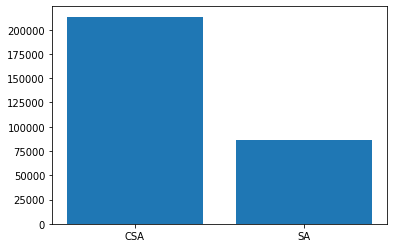

In [16]:
plt.bar(newData['ACT_TYPE'].unique(),newData.ACT_TYPE.value_counts())

<BarContainer object of 2 artists>

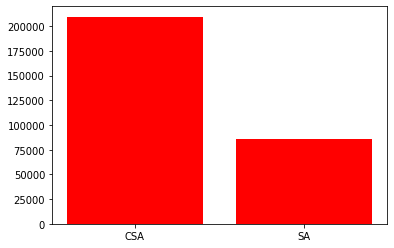

In [17]:
plt.bar(newData['ACT_TYPE'].unique(),newData.ACT_TYPE[newData.RESPONDERS == 'N'].value_counts(),color='r')

<BarContainer object of 2 artists>

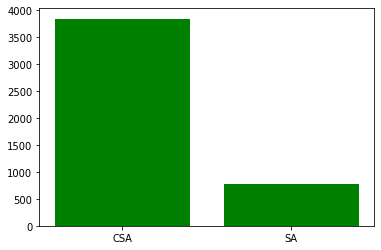

In [18]:
plt.bar(newData['ACT_TYPE'].unique(),newData.ACT_TYPE[newData.RESPONDERS == 'Y'].value_counts(),color='g')

In [0]:
leActType = LabelEncoder()

In [20]:
newData['ACT_TYPE'] = leActType.fit_transform(newData['ACT_TYPE'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Analysis of Gender

In [21]:
newData['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [0]:
def genderFill(df):
    df['GENDER'].fillna(str(df['GENDER'].mode().values[0]),inplace=True)

In [23]:
genderFill(newData)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<BarContainer object of 2 artists>

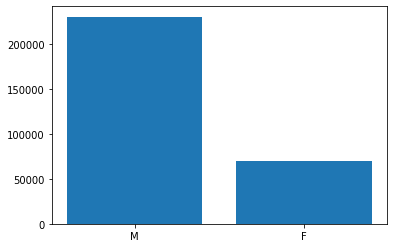

In [24]:
plt.bar(newData['GENDER'].unique(),newData.GENDER.value_counts())

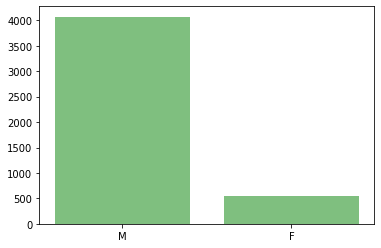

In [25]:
plt.bar(['M','F'],newData.GENDER[newData.RESPONDERS == 'Y'].value_counts(),color='g',alpha=0.5)
plt.show()

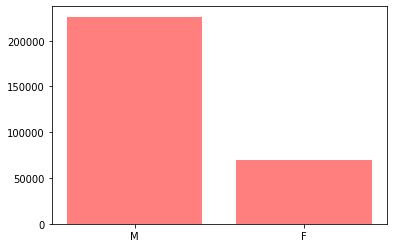

In [26]:
plt.bar(['M','F'],newData.GENDER[newData.RESPONDERS == 'N'].value_counts(),color='r',alpha=0.5)
plt.show()

In [0]:
leGen = LabelEncoder()

In [28]:
newData['GENDER'] = leGen.fit_transform(newData['GENDER'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Analysis on AGE

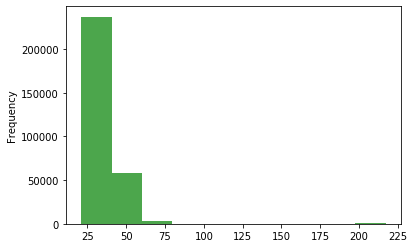

In [29]:
newData['AGE'].plot(kind='hist',alpha=0.7,color='g')

In [30]:
newData['AGE'][newData['AGE'] > 100].count()

1305

In [0]:
newData = newData[newData['AGE'] <= 100]

In [32]:
newData.shape

(298695, 49)

In [33]:
newData['AGE'].describe()

count    298695.000000
mean         33.355416
std           9.493298
min          21.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          65.000000
Name: AGE, dtype: float64

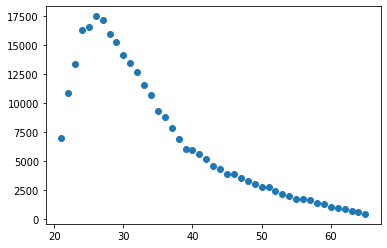

In [34]:
plt.scatter(newData['AGE'].value_counts().sort_index().index,newData['AGE'].value_counts().sort_index().values)

## Analysis on Legal Entity

In [35]:
newData['LEGAL_ENTITY'].unique()

array(['INDIVIDUAL', 'OTHERS', 'NON_GOVERNMENTAL_ORG', 'FIRM'],
      dtype=object)

In [0]:
leLe = LabelEncoder()

In [0]:
newData['LEGAL_ENTITY'] = leLe.fit_transform(newData['LEGAL_ENTITY'])

In [38]:
newData['LEGAL_ENTITY'].head()

0    1
1    1
2    1
3    1
4    1
Name: LEGAL_ENTITY, dtype: int64

<BarContainer object of 4 artists>

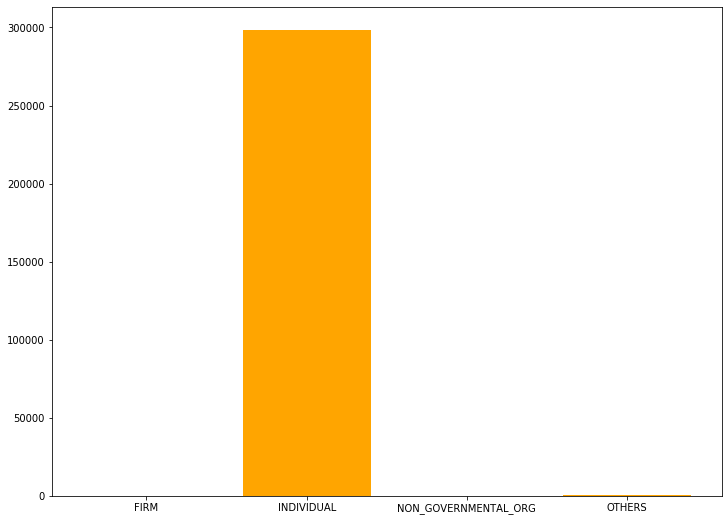

In [39]:
plt.figure(figsize=(12,9))
plt.bar(leLe.classes_,newData['LEGAL_ENTITY'].value_counts().sort_index().values,color='orange')

## Analysis on Occupation

In [40]:
newData['OCCUP_ALL_NEW'].unique()

array(['SALARIED'], dtype=object)

In [0]:
newData.drop('OCCUP_ALL_NEW',axis=1,inplace=True)

## Analysis of Average Monthly Balance

In [42]:
newData[['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04']].corr()

,AMB_MON_01,AMB_MON_02,AMB_MON_03,AMB_MON_04
AMB_MON_01,1.000000,0.844099,0.723092,0.648993
AMB_MON_02,0.844099,1.000000,0.863011,0.750984
AMB_MON_03,0.723092,0.863011,1.000000,0.868657
AMB_MON_04,0.648993,0.750984,0.868657,1.000000


In [0]:
def ambFill(df,listofcols):
    '''For fill na value in AMB_MON_0*(should be in asc order).'''
    for i in range(1,len(listofcols)):
        df[listofcols[i]][df[listofcols[i]].isnull()] = df[listofcols[i-1]][df[listofcols[i]].isnull()]

In [44]:
ambFill(newData,['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [45]:
newData.isnull().any()[newData.isnull().any().values == True]

ZIP_CODE_FINAL    True
EOP_MON_02        True
EOP_MON_03        True
dtype: bool

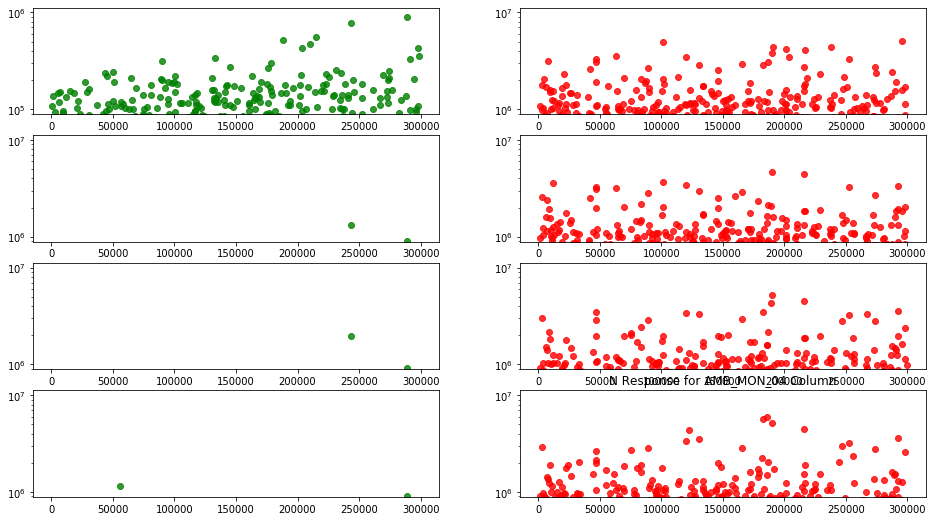

In [46]:
fig, axs = plt.subplots(4,2,figsize=(16,9))
y=0
x=0
for col in ['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04']:
    y=0
    cl = 'g'
    if x == 4:
        break
    for res in ['Y','N']:
        plt.title('{} Response for {} Column'.format(res,col))
        axs[x,y].scatter(newData[col][newData.RESPONDERS == res].sort_index().index, newData[col][newData.RESPONDERS == res].sort_index().values,color = cl,alpha=0.8)
        axs[x,y].set_yscale('log')
        y += 1
        cl = 'r'
    x += 1
plt.show()

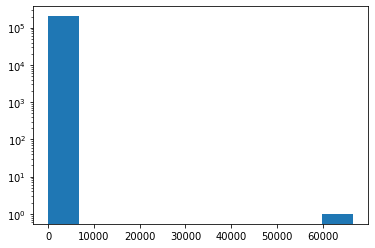

In [47]:
plt.hist(newData.AMB_MON_01.value_counts().sort_index())
plt.yscale('log')

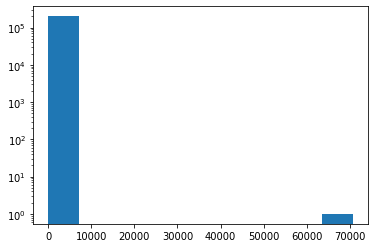

In [48]:
plt.hist(newData.AMB_MON_02.value_counts().sort_index())
plt.yscale('log')

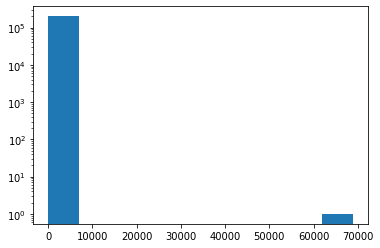

In [49]:
plt.hist(newData.AMB_MON_03.value_counts().sort_index())
plt.yscale('log')

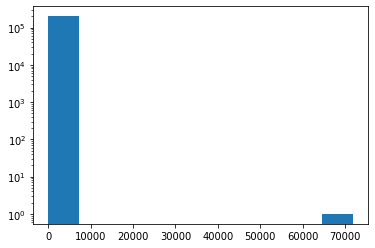

In [50]:
plt.hist(newData.AMB_MON_04.value_counts().sort_index())
plt.yscale('log')

## Analysis of Zipcode

In [51]:
newData['ZIP_CODE_FINAL'].dtype

dtype('O')

In [52]:
dicti = {'float':0,'int':0,'str':0}
for x in newData.ZIP_CODE_FINAL:
    if type(x) == str:
        dicti['str'] += 1
    elif type(x) == float:
        dicti['float'] += 1
    elif type(x) == int:
        dicti['int'] += 1
print(dicti)

{'float': 110423, 'int': 0, 'str': 188272}


In [53]:
newData.ZIP_CODE_FINAL.isnull().sum()

2140

In [0]:
newData = newData[newData.ZIP_CODE_FINAL.notnull()]

In [0]:
def cleaningZipCode(df):
    ind =[]
    count = 0
    countl = len(df)
    for index, value in enumerate(df.ZIP_CODE_FINAL):
        # print(index,value)
        try:
            if (len(str(value)) < 5):
                df.ZIP_CODE_FINAL.iloc[index] = 'EMPTY'
                # print('\'{}\' index will be chenged to \'{}\' value.\n'.format(index,df.ZIP_CODE_FINAL.iloc[index]))
            elif ' ' in str(value):
                df.ZIP_CODE_FINAL.iloc[index] = str(value).split(' ')[0] + str(value).split(' ')[1]
                # print("'{}' value for index '{}' was replaced with '{}'\n".format(value,index,df.ZIP_CODE_FINAL.iloc[index]))
            elif '.' in str(value):
                df.ZIP_CODE_FINAL.iloc[index] = str(value).split('.')[0]
                # print("'{}' value for index '{}' was replaced with '{}'\n".format(value,index,df.ZIP_CODE_FINAL.iloc[index]))
            else:
                df.ZIP_CODE_FINAL.iloc[index] = str(value)
        except ValueError:
            print('\'{}\' value is giving ValueError'.format(value))
            print('Record with index \'{}\' will be droped\n')
            ind.append(index)
        count += 1
        print('{}%'.format((((abs(count-countl))/countl)*100)))
    df.drop(index,inplace=True)

In [56]:
cleaningZipCode(newData)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


'4407' index will be chenged to 'EMPTY' value.

'7393' index will be chenged to 'EMPTY' value.

'11814' index will be chenged to 'EMPTY' value.

'17855' index will be chenged to 'EMPTY' value.

'18455' index will be chenged to 'EMPTY' value.

'22791' index will be chenged to 'EMPTY' value.

'25529' index will be chenged to 'EMPTY' value.

'31289' index will be chenged to 'EMPTY' value.

'43179' index will be chenged to 'EMPTY' value.

'43597' index will be chenged to 'EMPTY' value.

'45266' index will be chenged to 'EMPTY' value.

'48732' index will be chenged to 'EMPTY' value.

'57002' index will be chenged to 'EMPTY' value.

'60176' index will be chenged to 'EMPTY' value.

'60987' index will be chenged to 'EMPTY' value.

'69502' index will be chenged to 'EMPTY' value.

'70391' index will be chenged to 'EMPTY' value.

'71477' index will be chenged to 'EMPTY' value.

'74181' index will be chenged to 'EMPTY' value.

'75755' index will be chenged to 'EMPTY' value.

'78885' index will be 

In [0]:
lezc = LabelEncoder()

In [0]:
newData.ZIP_CODE_FINAL = lezc.fit_transform(newData.ZIP_CODE_FINAL)

## Analysis on EOP MON

In [59]:
EOP = ['EOP_MON_02','EOP_MON_03']
newData[EOP].describe()

,EOP_MON_02,EOP_MON_03
count,2.955660e+05,2.937910e+05
mean,2.170817e+04,2.177108e+04
std,6.829553e+04,6.652719e+04
min,-2.511007e+06,-2.511007e+06
25%,0.000000e+00,0.000000e+00
50%,1.520810e+03,1.650450e+03
75%,1.979134e+04,2.049374e+04
max,5.366019e+06,7.500850e+06


In [60]:
newData[EOP].head()

,EOP_MON_02,EOP_MON_03
0,0.00,0.00
1,3016.77,3.02
2,9999.00,14858.75
3,27163.10,49675.27
4,21065.87,983.87


In [61]:
newData[EOP].isnull().sum()

EOP_MON_02     988
EOP_MON_03    2763
dtype: int64

In [0]:
newData.EOP_MON_02.fillna(0,inplace=True)

In [0]:
newData.EOP_MON_03.fillna(0,inplace=True)

In [64]:
newData.isnull().any()[newData.isnull().any().values == True]

Series([], dtype: bool)

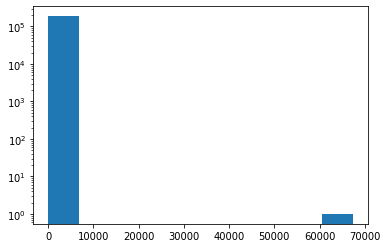

In [65]:
plt.hist(newData.EOP_BAL_MON_01.value_counts().sort_index())
plt.yscale('log')

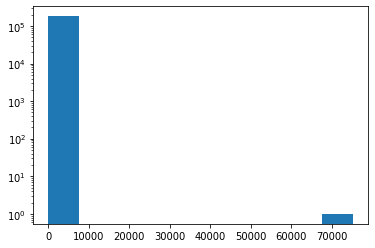

In [66]:
plt.hist(newData.EOP_MON_02.value_counts().sort_index())
plt.yscale('log')

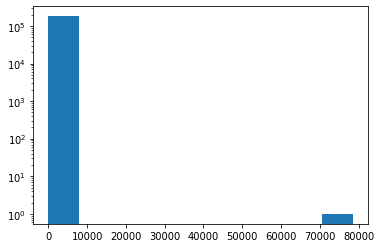

In [67]:
plt.hist(newData.EOP_MON_03.value_counts().sort_index())
plt.yscale('log')

## Analysis on Binary Data Columns

In [0]:
def listBinCols(df):
    bincols = []
    for col in df.columns:
        if df[col].nunique() == 2:
            if sorted(df[col].unique()) == ['N','Y']:
                bincols.append(col)
                # print('{} Column has {} unique values'.format(col,df[col].unique()))
    return bincols

In [0]:
binCols = listBinCols(newData)

In [0]:
leBin = LabelEncoder()


In [0]:
def leBincols(df):
    for col in binCols:
        df[col] = leBin.fit_transform(df[col])

In [0]:
leBincols(newData)

## Analysis on CHANNEL_CLICK_DISP

In [73]:
newData.CHANNEL_CLICK_DISP.nunique()

3

In [74]:
newData.CHANNEL_CLICK_DISP.unique()

array(['NONE', 'DISP', 'CLICK'], dtype=object)

<BarContainer object of 3 artists>

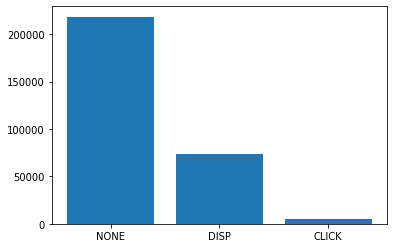

In [75]:
plt.bar(newData.CHANNEL_CLICK_DISP.unique(),newData.CHANNEL_CLICK_DISP.value_counts())

<BarContainer object of 3 artists>

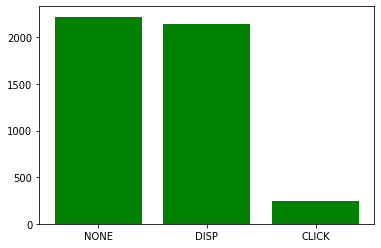

In [76]:
plt.bar(newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 1].unique(),newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 1].value_counts(),color='g')

<BarContainer object of 3 artists>

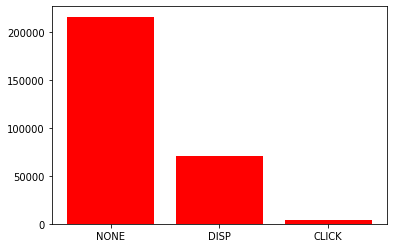

In [77]:
plt.bar(newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 0].unique(),newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 0].value_counts(),color='r')

In [0]:
leccd = LabelEncoder()

In [0]:
newData.CHANNEL_CLICK_DISP = leccd.fit_transform(newData.CHANNEL_CLICK_DISP)

## Analysis on Designation

In [80]:
newData.DESIGNATION_FINAL.nunique()

11

In [81]:
newData.DESIGNATION_FINAL.unique()

array(['MISSING', 'ENGINEER', 'MANAGER', 'EXECUTIVE', 'SUP/TECH/OPR',
       'OFFICER', 'OTHERS', 'DEVEP/PROG/ANALYST/ASSO', 'REMAING',
       'TOP_MANAG/DOC', 'TEACH/PROF/CONSULT'], dtype=object)

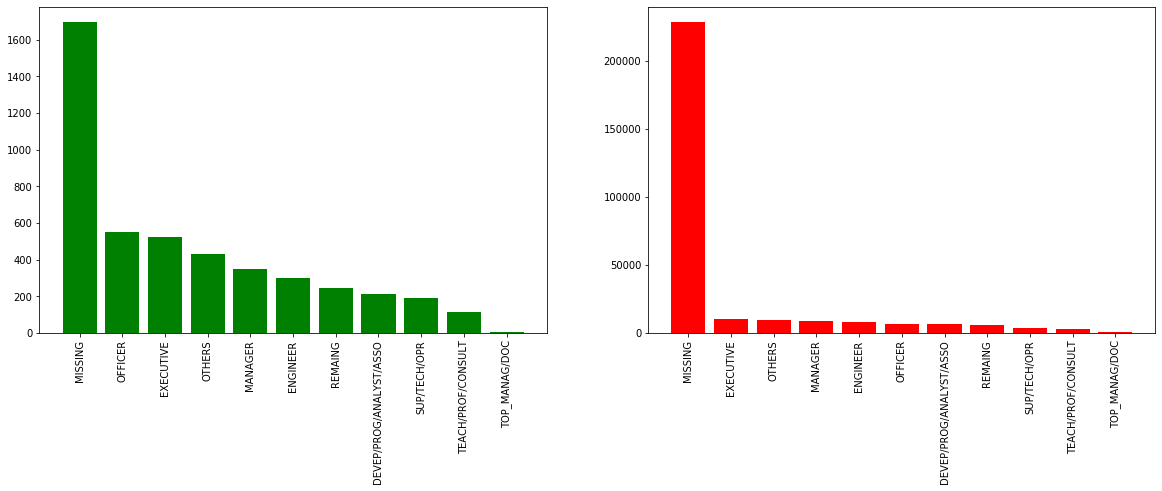

In [82]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].bar(newData.DESIGNATION_FINAL[newData.RESPONDERS == 1].value_counts().index, newData.DESIGNATION_FINAL[newData.RESPONDERS == 1].value_counts().values,color='g')
ax[1].bar(newData.DESIGNATION_FINAL[newData.RESPONDERS == 0].value_counts().index, newData.DESIGNATION_FINAL[newData.RESPONDERS == 0].value_counts().values,color='r')
for i in range(2):
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(90)

In [0]:
ledes = LabelEncoder()

In [0]:
newData.DESIGNATION_FINAL = ledes.fit_transform(newData.DESIGNATION_FINAL)

## Analysis on CC DC Catogories

In [0]:
ccdc = ['NEFT_CC_CATEGORY', 'NEFT_DC_CATEGORY', 'TPT_DC_CATEGORY_MON_01',
       'TPT_CC_CATEGORY_MON_01', 'IMPS_CC_CATEGORY_MON_01']

In [0]:
def ccdcUnique(df):
    for col in ccdc:
        print('{} has {} unique values: \n{}\n\n'.format(col, df[col].nunique(), df[col].unique()))

In [87]:
ccdcUnique(newData)

NEFT_CC_CATEGORY has 20 unique values: 
['NO_NEFT_TXN' 'NOT_RELEVANT' 'LOAN' 'RETURN' 'TRANSFER' 'RENT' 'TRAVEL'
 'EDUCATION' 'EMI' 'PERSONAL' 'MEDICAL' 'BUILDER' 'JEWELLERY' 'ELECTRICI'
 'GAS' 'WEDDING' 'OPERATION' 'ADVANCE' 'CHILD_BIR' 'HELP']


NEFT_DC_CATEGORY has 20 unique values: 
['NO_NEFT_TXN' 'NOT_RELEVANT' 'LOAN' 'RENT' 'JEWELLERY' 'EDUCATION'
 'MEDICAL' 'TRAVEL' 'PERSONAL' 'CC_PAYMENT' 'BUILDER' 'GAS' 'EMI'
 'CHILD_BIR' 'TRANSFER' 'HELP' 'WEDDING' 'ELECTRICI' 'OPERATION' 'RETURN']


TPT_DC_CATEGORY_MON_01 has 21 unique values: 
['NO_TPT_TXN' 'NOT_RELEVANT' 'MEDICAL' 'LOAN' 'TRANSFER' 'TRAVEL'
 'PERSONAL' 'RENT' 'CC_PAYMENT' 'RETURN' 'EMI' 'EDUCATION' 'BUILDER'
 'CHILD_BIR' 'HELP' 'ADVANCE' 'WEDDING' 'GAS' 'ELECTRICI' 'OPERATION'
 'JEWELLERY']


TPT_CC_CATEGORY_MON_01 has 21 unique values: 
['NO_TPT_TXN' 'NOT_RELEVANT' 'TRANSFER' 'LOAN' 'PERSONAL' 'RETURN' 'RENT'
 'TRAVEL' 'CC_PAYMENT' 'EMI' 'CHILD_BIR' 'EDUCATION' 'GAS' 'ADVANCE'
 'MEDICAL' 'HELP' 'ELECTRICI' 'WEDDING' 'BUIL

In [0]:
def leCCDC(df,lst):
    le1 = LabelEncoder()
    le2 = LabelEncoder()
    le3 = LabelEncoder()
    le4 = LabelEncoder()
    le5 = LabelEncoder()
    le = [le1,le2,le3,le4,le5]
    zipped = list(zip(le,lst))
    for i in range(len(zipped)):
        print(zipped[i][1])
        df[zipped[i][1]] = zipped[i][0].fit_transform(df[zipped[i][1]])
    return le

In [89]:
[le1,le2,le3,le4,le5] = leCCDC(newData,ccdc)

NEFT_CC_CATEGORY
NEFT_DC_CATEGORY
TPT_DC_CATEGORY_MON_01
TPT_CC_CATEGORY_MON_01
IMPS_CC_CATEGORY_MON_01


In [90]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,0,1,1,21,0.00,0.00,0,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,5802,0,0,0,0,0,0,0,0,0,0,NONE,0.00,0.00,0.000000,0
1,286891,0,1,1,23,8243.77,7.77,0,0,1,1,0,11.77,1417.26,300.51,593.06,418.09,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,11193,0,0,0,0,0,0,0,0,0,0,NONE,3016.77,3.02,0.000000,0
2,108751,0,1,1,41,26515.00,0.00,0,0,1,0,0,26458.25,5354.65,6100.73,7955.82,11138.53,0,0,0,0,1,2,4,0,0,0,12,11,13,13,13,154,0,0,0,0,0,0,0,0,0,0,NONE,9999.00,14858.75,0.000000,0
3,278651,0,1,1,28,65917.28,8270.28,1,1,1,1,1,65917.28,113120.39,35560.81,42686.93,61593.38,1,0,0,0,0,2,4,0,0,0,12,12,13,13,13,4035,0,0,1,0,0,1,0,1,1,0,NONE,27163.10,49675.27,0.000000,0
4,23637,0,1,1,34,22260.94,6060.94,1,1,1,0,0,6172.94,9099.94,15858.71,14008.08,4570.73,0,0,0,0,0,2,1,0,0,0,12,12,13,13,12,167,0,0,0,0,0,0,0,0,1,0,NONE,21065.87,983.87,251.758794,0


## Analysis on TOP_CORP_TAG

In [91]:
newData.TOP_CORP_TAG.nunique()

3

In [92]:
newData.TOP_CORP_TAG.unique()

array(['NONE', 'TOP_100', 'TOP_800'], dtype=object)

<BarContainer object of 3 artists>

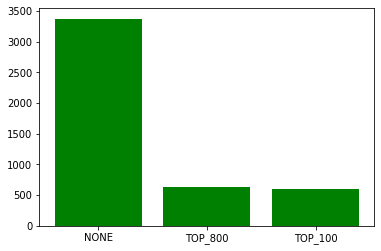

In [93]:
plt.bar(newData.TOP_CORP_TAG[newData.RESPONDERS == 1].value_counts().index, newData.TOP_CORP_TAG[newData.RESPONDERS == 1].value_counts().values, color = 'g')

<BarContainer object of 3 artists>

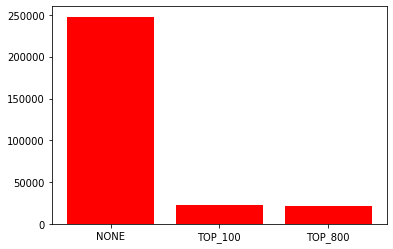

In [94]:
plt.bar(newData.TOP_CORP_TAG[newData.RESPONDERS == 0].value_counts().index, newData.TOP_CORP_TAG[newData.RESPONDERS == 0].value_counts().values, color = 'r')

In [0]:
letct = LabelEncoder()

In [0]:
newData.TOP_CORP_TAG = letct.fit_transform(newData.TOP_CORP_TAG)

## Analysis on N_CASA_MAX_BALANCE_MTD

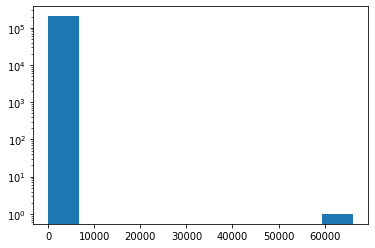

In [97]:
plt.hist(newData.N_CASA_MAX_BALANCE_MTD.value_counts().sort_index())
plt.yscale('log')

## Analysis on N_CASA_MIN_BALANCE_MTD

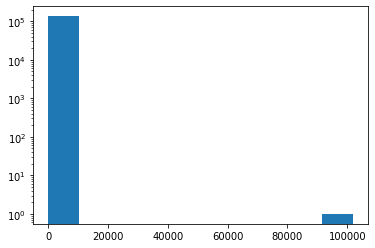

In [98]:
plt.hist(newData.N_CASA_MIN_BALANCE_MTD.value_counts().sort_index())
plt.yscale('log')

## Analysis on SCRUB EMI

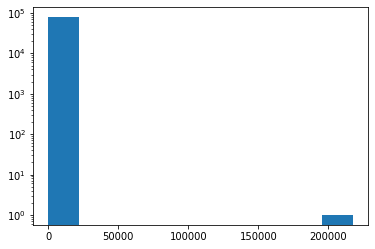

In [99]:
plt.hist(newData.SCRUB_EMI.value_counts().sort_index())
plt.yscale('log')

# Preprocessing

In [100]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,0,1,1,21,0.00,0.00,0,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,5802,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000,0
1,286891,0,1,1,23,8243.77,7.77,0,0,1,1,0,11.77,1417.26,300.51,593.06,418.09,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,11193,0,0,0,0,0,0,0,0,0,0,0,3016.77,3.02,0.000000,0
2,108751,0,1,1,41,26515.00,0.00,0,0,1,0,0,26458.25,5354.65,6100.73,7955.82,11138.53,0,0,0,0,1,2,4,0,0,0,12,11,13,13,13,154,0,0,0,0,0,0,0,0,0,0,0,9999.00,14858.75,0.000000,0
3,278651,0,1,1,28,65917.28,8270.28,1,1,1,1,1,65917.28,113120.39,35560.81,42686.93,61593.38,1,0,0,0,0,2,4,0,0,0,12,12,13,13,13,4035,0,0,1,0,0,1,0,1,1,0,0,27163.10,49675.27,0.000000,0
4,23637,0,1,1,34,22260.94,6060.94,1,1,1,0,0,6172.94,9099.94,15858.71,14008.08,4570.73,0,0,0,0,0,2,1,0,0,0,12,12,13,13,12,167,0,0,0,0,0,0,0,0,1,0,0,21065.87,983.87,251.758794,0


In [0]:
newData.reset_index(drop=True, inplace=True)

In [0]:
# def scaleCols(df,cols):
    # mms = StandardScaler()
    # for col in cols:
        # df[col] = mms.fit_transform(df[col])

In [0]:
# scaleCols(newData,['N_CASA_MAX_BALANCE_MTD','N_CASA_MIN_BALANCE_MTD','EOP_BAL_MON_01','AMB_MON_04','AMB_MON_03','AMB_MON_02','AMB_MON_01','EOP_MON_02','EOP_MON_03','SCRUB_EMI'])

In [0]:
X = newData.iloc[:,1:-1].values
# Xs = newDataScaled.iloc[:,1:-1].values

In [0]:
y =  newData.iloc[:,-1].values
# ys =  newDataScaled.iloc[:,-1].values

# Modeling

In [0]:
skf = StratifiedKFold(n_splits=3)

In [0]:
def applyModel(clf):
    for trainIndex,testIndex in skf.split(X,y):
        clf.fit(X[trainIndex],y[trainIndex])
        pred = clf.predict(X[testIndex])
        print('Accuracy for Data is {}\n'.format(accuracy_score(y[testIndex],pred)))
    return clf

In [0]:
def applyModelScaled(clf):
    for trainIndex,testIndex in skf.split(Xs,ys):
        clf.fit(Xs[trainIndex],ys[trainIndex])
        pred = clf.predict(xs[testIndex])
        print('Accuracy for Scaled Data is {}\n'.format(accuracy_score(ys[testIndex],pred)))

## Logistic Regression

In [0]:
logreg = LogisticRegression()

In [124]:
logres = applyModel(logreg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for Data is 0.9842592967264193



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for Data is 0.9844346430353795



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for Data is 0.984353502926974

Accuracy for Data is 0.984447921443794



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [112]:
# applyModelScaled(logreg)

NameError: ignored

## Decision Tree

In [0]:
dtc = DecisionTreeClassifier()

In [147]:
dtc = applyModel(dtc)

Accuracy for Data is 0.9670112896046615



KeyboardInterrupt: ignored

In [0]:
# applyModelScaled(dtc)

## Random Forest

In [0]:
rfc = RandomForestClassifier()

In [128]:
rfc = applyModel(rfc)

Accuracy for Data is 0.9844481312129918

Accuracy for Data is 0.9844616193906042

Accuracy for Data is 0.984447921443794

Accuracy for Data is 0.984447921443794



In [0]:
# applyModelScaled(rfc)

## XGBOOST

In [0]:
xgb = xgboost.XGBClassifier()

In [131]:
xgb = applyModel(xgb)

Accuracy for Data is 0.9844616193906042

Accuracy for Data is 0.9844616193906042

Accuracy for Data is 0.9844748981628855

Accuracy for Data is 0.9844614098033397



In [0]:
# applyModelScaled(xgb)

## Naive Bayes

In [0]:
nbc = GaussianNB()

In [148]:
nbc = applyModel(nbc)

Accuracy for Data is 0.9816189859588071

Accuracy for Data is 0.173159603848216

Accuracy for Data is 0.226897047070844



In [0]:
# applyModelScaled(nbc)

## Neural Network

In [0]:
ann = MLPClassifier()

In [140]:
ann = applyModel(ann)

Accuracy for Data is 0.9844616193906042

Accuracy for Data is 0.9844346430353795

Accuracy for Data is 0.9844614098033397

Accuracy for Data is 0.9844209447247025



In [0]:
# applyModelScaled(ann)